In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.image as mpimg
import random
import math

import tensorflow_datasets as tfds
from tensorflow import keras 
from keras import layers
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator

from keras.layers.convolutional.conv2d_transpose import Conv2DTranspose
from keras.layers.reshaping.up_sampling2d import UpSampling2D

import wandb
from wandb.keras import WandbMetricsLogger, WandbModelCheckpoint

## Synthetic Data

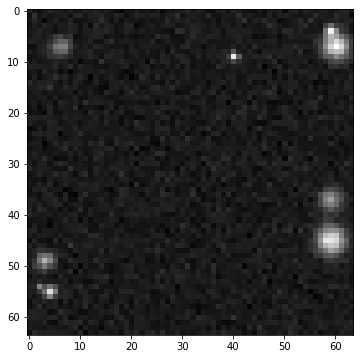

In [134]:
def make_image(shape, noise_mean = 1, noise_std = 1, num_obj = 1):

    rows = shape[0]
    cols = shape[1]

    # add noise
    num_pixels = sum(shape)
    noise_layer = np.random.normal(loc = noise_mean, scale = noise_std, size = shape)
    image = noise_layer
    

    for i in range(num_obj):
        sigma = np.random.uniform(0.2,2)
        amp = np.random.uniform(1,3)
        x0, y0 = np.random.randint(0, rows), np.random.randint(0, cols)
        x, y = np.meshgrid(np.arange(cols), np.arange(rows))
        gaussian = amp*np.exp(-((x-x0)**2 + (y-y0)**2) / (2*sigma**2))


        image += gaussian


    return image


# testing

shape = (64,64)
noise_mean = 1
noise_std = 0.1
num_obj = np.random.randint(1,10)

image = make_image(shape, noise_mean, noise_std, num_obj)
plt.figure(figsize = (6,6))
plt.imshow(image, cmap = 'gray')


## BVAE